In [1]:
using DifferentialEquations

In [2]:
using DifferentialEquations

In [3]:
function sir_ode!(du, u, p, t) # ! since modifies du
    S, I, R = u
    β, γ = p
    
    dS = -β * S * I
    dI = +β * S * I - γ * I
    dR = +γ * I
    
    du .= (dS, dI, dR)  # copy values into du
end

sir_ode! (generic function with 1 method)

In [6]:
β = 0.1
γ = 0.05
parameters = [β, γ]

S₀ = 0.99
I₀ = 0.01
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

time_span = [0.0, 200.0]  # initial and final time

# set up problem:
problem = ODEProblem(sir_ode!, initial_values, time_span, parameters)

# solve problem:
solution = solve(problem, saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Array{Float64,1}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   1.0
   1.1
   1.2
   ⋮
 198.9
 199.0
 199.1
 199.2
 199.3
 199.4
 199.5
 199.6
 199.7
 199.8
 199.9
 200.0
u: 2001-element Array{Array{Float64,1},1}:
 [0.99, 0.01, 0.0]
 [0.9899007620439206, 0.01004911526404097, 5.012269203835053e-5]
 [0.9898010467485492, 0.010098461713420163, 0.00010049153803066705]
 [0.9897008519670815, 0.010148040336446743, 0.00015110769647183207]
 [0.989600175544873, 0.01019785212459509, 0.00020197233053187715]
 [0.9894990153190228, 0.010247898072564106, 0.0002530866084130026]
 [0.9893973691183536, 0.010298179178280388, 0.00030445170336601107]
 [0.9892952347634115, 0.01034869644289822, 0.0003560687936903061]
 [0.9891926100664665, 0.010399450870799583, 0.00040793906273389383]
 [0.9890894928315125, 0.01045044346959414, 0.00046006369889337886]
 [0.9889858808542668, 0.010501675250119254, 0.000512443895613971]
 [0.98

In [7]:
using Plots

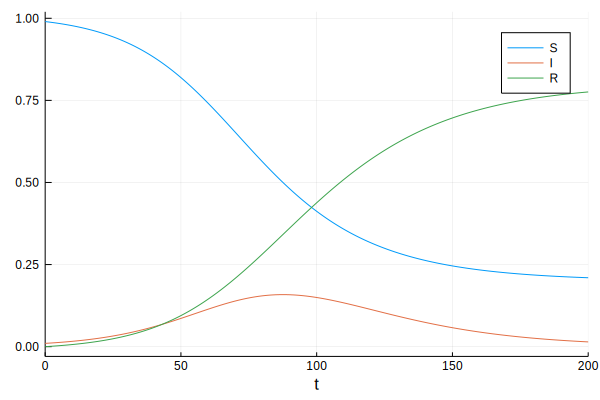

In [8]:
plot(solution, label=["S" "I" "R"])  # row vector of labels

In [9]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13041777286402219643\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5929052363206907601\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13041777286402219643\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [11]:
r = 0.0:±01:2.0

@manipulate for β in r, γ in r, T in 0:1:500.0
    parameters = [β, γ]

    time_span = [0, T]  # initial and final time

    # set up problem:
    problem = ODEProblem(sir_ode!, initial_values, time_span, parameters)

    # solve problem:
    solution = solve(problem, saveat = 0.1)
    
    plot(solution, label = ["S" "I" "R"])
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["β"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 2001,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
1001, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\chuan\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\chuan\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000004cdeab30, Task (runnable) @0x000000004cdeab30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.001\",\"0.002\",\"0.003\",\"0.004\",\"0.005\",\"0.006\",\"0.007\",\"0.008\",\"0.009\",\"0.01\",\"0.011\",\"0.012\",\"0.013\",\"0.014\",\"0.015\",\"0.016\",\"0.017\",\"0.018\"

In [14]:
using Measurements

┌ Info: Precompiling Measurements [eff96d63-e80a-5855-80a2-b1b0885c5ab7]
└ @ Base loading.jl:1260


In [15]:
x = 0.1 ± 0.01

0.1 ± 0.01

In [16]:
typeof(x)

Measurement{Float64}

In [17]:
2x

0.2 ± 0.02

In [18]:
x^2

0.01 ± 0.002

In [22]:
β = 0.1  ± 0.01
γ = 0.05 ± 0.01
parameters = [β, γ]

S₀ = 0.99
I₀ = 0.01 
R₀ = 0.0

initial_values = [S₀, I₀, R₀]

time_span = [0.0, 200.0]  # initial and final time

# set up problem:
problem = ODEProblem(sir_ode!, initial_values, time_span, parameters)

# solve problem:
solution = solve(problem, saveat = 1.0)

retcode: Success
Interpolation: 1st order linear
t: 201-element Array{Float64,1}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 189.0
 190.0
 191.0
 192.0
 193.0
 194.0
 195.0
 196.0
 197.0
 198.0
 199.0
 200.0
u: 201-element Array{Array{Measurement{Float64},1},1}:
 [0.99 ± 0.0, 0.01 ± 0.0, 0.0 ± 0.0]
 [0.98899 ± 0.00011, 0.0105 ± 0.00015, 0.000512 ± 0.0001]
 [0.98792 ± 0.00023, 0.01103 ± 0.00031, 0.00105 ± 0.0002]
 [0.98681 ± 0.00037, 0.01158 ± 0.00049, 0.00162 ± 0.0003]
 [0.98564 ± 0.00053, 0.01215 ± 0.00068, 0.00221 ± 0.0004]
 [0.98441 ± 0.00072, 0.01276 ± 0.00089, 0.00283 ± 0.0005]
 [0.98312 ± 0.00092, 0.0134 ± 0.0011, 0.00349 ± 0.0006]
 [0.9818 ± 0.0012, 0.0141 ± 0.0014, 0.00417 ± 0.0007]
 [0.9804 ± 0.0014, 0.0147 ± 0.0017, 0.00489 ± 0.0008]
 [0.9789 ± 0.0017, 0.0155 ± 0.0019, 0.00565 ± 0.0009]
 [0.9773 ± 0.002, 0.0162 ± 0.0023, 0.0064 ± 0.001]
 [0.9757 ± 0.0024, 0.017 ± 0.0026, 0.0073 ± 0.0011]
 [0.974 ± 0.0028, 0.0178 ± 0.003, 0

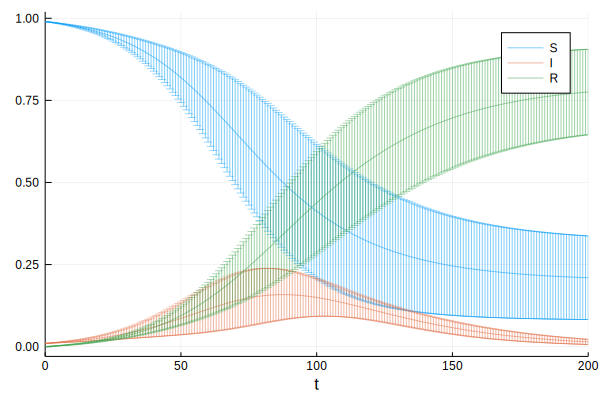

In [23]:
plot(solution, alpha=0.5, label=["S" "I" "R"])

In [24]:
struct MyMeasurement
    mid::Float64
    width::Float64
end

In [25]:
MyMeasurement(3, 1)

MyMeasurement(3.0, 1.0)

In [26]:
function Base.show(io::IO, x::MyMeasurement)
    print(io, "$(x.mid) ± $(x.width)")
end

In [27]:
x = MyMeasurement(3, 1)

3.0 ± 1.0

In [28]:
Measurements.:±(x, y) = MyMeasurement(x, y)

In [29]:
import Base: +
+(x::MyMeasurement, y::MyMeasurement) = MyMeasurement(x.mid + y.mid, x.width + y.width)

+ (generic function with 315 methods)

In [30]:
x = MyMeasurement(2, 0.1)
y = MyMeasurement(3, 0.01)
x + y

5.0 ± 0.11

## Anonymous Functions

In [31]:
x -> 3x

#5 (generic function with 1 method)

In [32]:
(x -> 3x)(10)

30

In [33]:
g = x -> 3x

#9 (generic function with 1 method)

In [34]:
g(10)

30